# Name: Abhay Sharma
# Roll: 22CH10001

# SVC

In [6]:
from keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten images to 1D vector of 784 features
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

# Normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

# Select first 10,000 samples for training and 2,000 for testing
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:2000]
y_test = y_test[:2000]

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Linear Kernel
linear_svc = SVC(kernel='linear')
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
print("Linear Kernel Classification Report:")
print(classification_report(y_test, y_pred))

# Polynomial Kernel 
poly_svc = SVC(kernel='poly')
poly_svc.fit(x_train, y_train)
y_pred = poly_svc.predict(x_test)
print("\nPolynomial Kernel Classification Report:")
print(classification_report(y_test, y_pred))

# RBF Kernel
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(x_train, y_train)
y_pred = rbf_svc.predict(x_test)
print("\nRBF Kernel Classification Report:")
print(classification_report(y_test, y_pred))

Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       175
           1       0.96      0.99      0.98       234
           2       0.89      0.89      0.89       219
           3       0.84      0.88      0.86       207
           4       0.90      0.94      0.92       217
           5       0.89      0.84      0.87       179
           6       0.90      0.93      0.91       178
           7       0.89      0.86      0.88       205
           8       0.89      0.83      0.86       192
           9       0.89      0.84      0.86       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000


Polynomial Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       175
           1       0.91      0.99      0.95       234

In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
import numpy as np

# Grid Search
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001]}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters (Grid Search):", grid_search.best_params_)
print("Best score (Grid Search):", grid_search.best_score_)

# Randomized Search
param_dist = {'C': np.logspace(-2, 2, 20),
              'gamma': np.logspace(-2, 2, 20)}

random_search = RandomizedSearchCV(SVC(kernel='rbf'), param_dist, cv=5, n_iter=20)
random_search.fit(x_train, y_train)

print("\nBest parameters (Random Search):", random_search.best_params_)
print("Best score (Random Search):", random_search.best_score_)

Best parameters (Grid Search): {'C': 100, 'gamma': 0.01}
Best score (Grid Search): 0.9647


KeyboardInterrupt: 

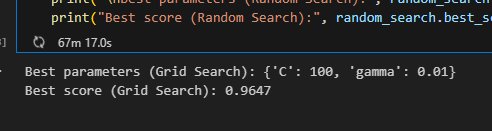

the code ran and got the values of best parameters but was still running so I had to keyboard interrupt

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Get best hyperparameters from GridSearchCV
best_params = grid_search.best_params_

# Train SVC model with best hyperparameters
svc_rbf = SVC(kernel='rbf', **best_params)
svc_rbf.fit(x_train, y_train)

# Evaluate model performance on test set
y_pred = svc_rbf.predict(x_test)
print("Classification Report (Best Hyperparameters):")
print(classification_report(y_test, y_pred))

Classification Report (Best Hyperparameters):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       175
           1       0.97      0.99      0.98       234
           2       0.95      0.95      0.95       219
           3       0.95      0.95      0.95       207
           4       0.95      0.96      0.96       217
           5       0.98      0.94      0.96       179
           6       0.93      0.97      0.95       178
           7       0.94      0.92      0.93       205
           8       0.97      0.94      0.96       192
           9       0.94      0.92      0.93       194

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



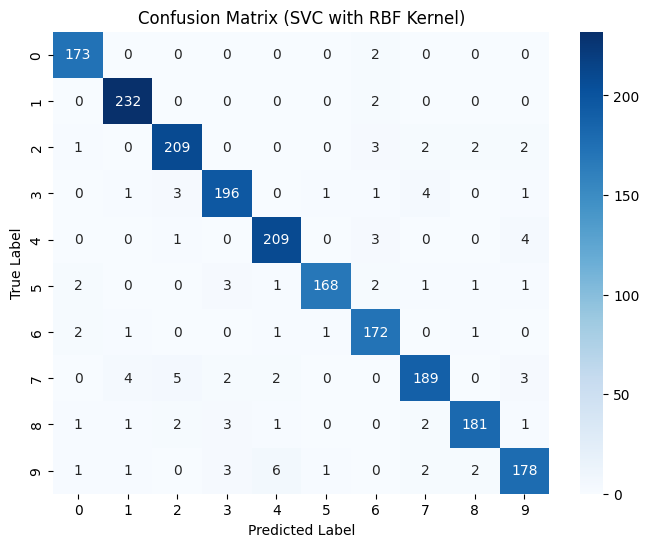

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on test set
y_pred = svc_rbf.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix (SVC with RBF Kernel)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# SVR

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Mean Squared Error (Default Parameters): 1.39


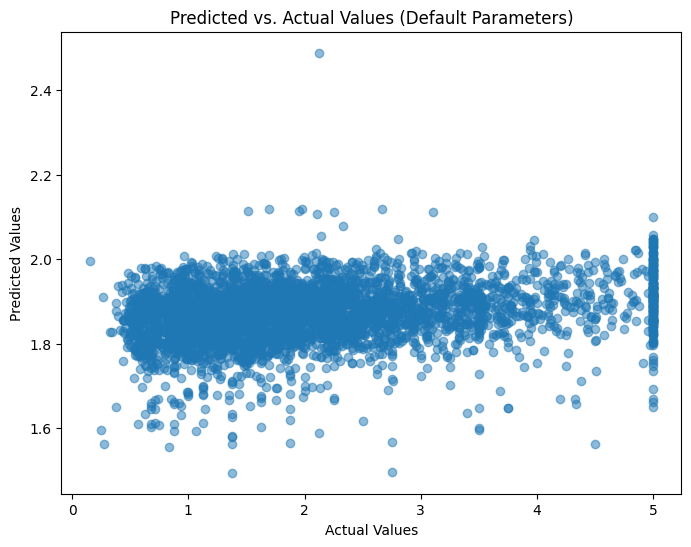

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Train SVR model with default parameters (epsilon=0.5)
svr = SVR(epsilon=0.5)
svr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svr.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Default Parameters): {mse:.2f}")

# Create a scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Default Parameters)")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np

# Define the range of epsilon values
epsilon_range = np.arange(0, 2.6, 0.1)

# Set up the parameter grid
param_grid = {'epsilon': epsilon_range}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=10)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best epsilon value
print(f"Best epsilon value: {grid_search.best_params_['epsilon']:.2f}")

Best epsilon value: 1.00


Mean Squared Error (Best Hyperparameter): 1.36


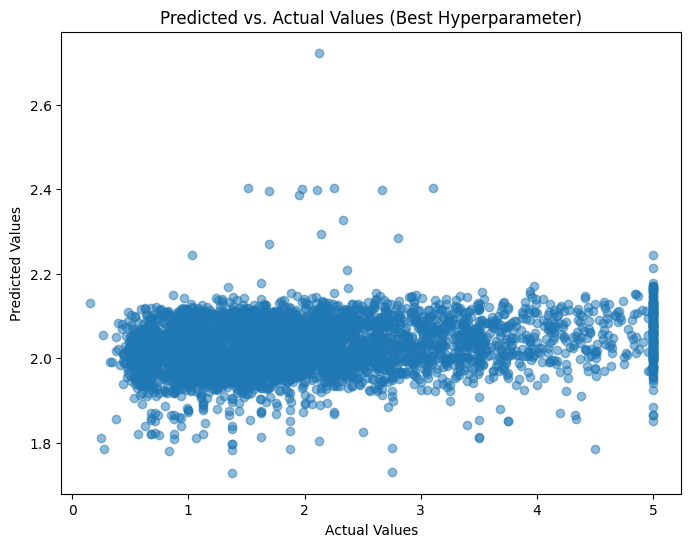

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Get the best epsilon value from GridSearchCV
best_epsilon = grid_search.best_params_['epsilon']

# Train SVR model with the best epsilon value
svr_best = SVR(epsilon=best_epsilon)
svr_best.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_best = svr_best.predict(X_test)

# Calculate mean squared error
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Mean Squared Error (Best Hyperparameter): {mse_best:.2f}")

# Create a scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Best Hyperparameter)")
plt.show()